In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.1, random_state=42, shuffle=False)
y_train, y_test = train_test_split(y, test_size=0.1, random_state=42, shuffle=False)

In [6]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
svm_clf = SVC(kernel="poly", gamma="auto", random_state=42)
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [7]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[6117,    1,   18,    4,    3,   19,   15,    4,    9,    4],
       [   1, 7000,   22,    7,    5,    3,    7,   12,   19,    6],
       [  34,   19, 6102,   13,   15,    6,   10,   37,   28,    7],
       [   9,   10,   53, 6229,    2,   50,    1,   25,   49,   19],
       [  10,   11,   15,    1, 6035,    1,   14,   10,    9,   54],
       [  21,    8,   15,   47,    8, 5521,   34,    4,   26,   20],
       [  25,   12,    6,    1,   21,   28, 6078,    0,   19,    0],
       [   6,   24,   36,    8,   26,    7,    0, 6417,    7,   40],
       [  21,   31,   25,   57,   16,   45,   15,   13, 5888,   26],
       [  30,   10,    8,   32,   64,   20,    1,   52,   17, 6010]])

In [8]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_train, y_train_pred)
print(score)

0.9745555555555555


Saving figure confusion_matrix_plot


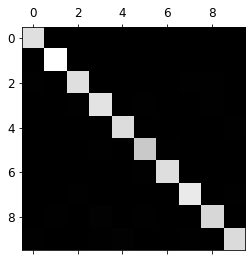

In [9]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [10]:
y_test_pred = svm_clf.predict(X_test)
score = accuracy_score(y_test, y_test_pred)
print(score)

0.9842857142857143
